# Deep Learning Tutorial 


Download required packages 

Pytorch is a python package that are being used a lot in machine learning. And we will use it in our tutorial this time.

In [ ]:
pip install -U d2l 

     |████████████████████████████████| 82 kB 373 kB/s 
     |████████████████████████████████| 82 kB 120 kB/s 
     |████████████████████████████████| 20.1 MB 20.3 MB/s 
     |████████████████████████████████| 11.6 MB 30.9 MB/s 
     |████████████████████████████████| 9.9 MB 41.3 MB/s 
     |████████████████████████████████| 61 kB 7.5 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

##From Multilayer Perceptron to Convolutional Neural Network

In the former tutorial, we have introduced multilayer perceptron (MLP), which is also known as the fully-connected network. In MLP, we modified pictures into arrays and built a network with the array. However, we are not trying to understand the image itself. This tutorial will build a network that can "understand" the picture itself, which is a convolutional neural network.


##Properties of Convolutional Neural Network 
There are two predominant properties of convolutional neural network: invariance and locality. Consider the picture below. We want to recognize  a guy called Waldo. The neural network should be able to find Waldo wherever it is located. This is the concept of invariance. Besides, when we are trying to find Waldo, we should look at a specific area of the picture. This is the concept of locality.  We will revisit these two ideas later, so keep them in mind. 




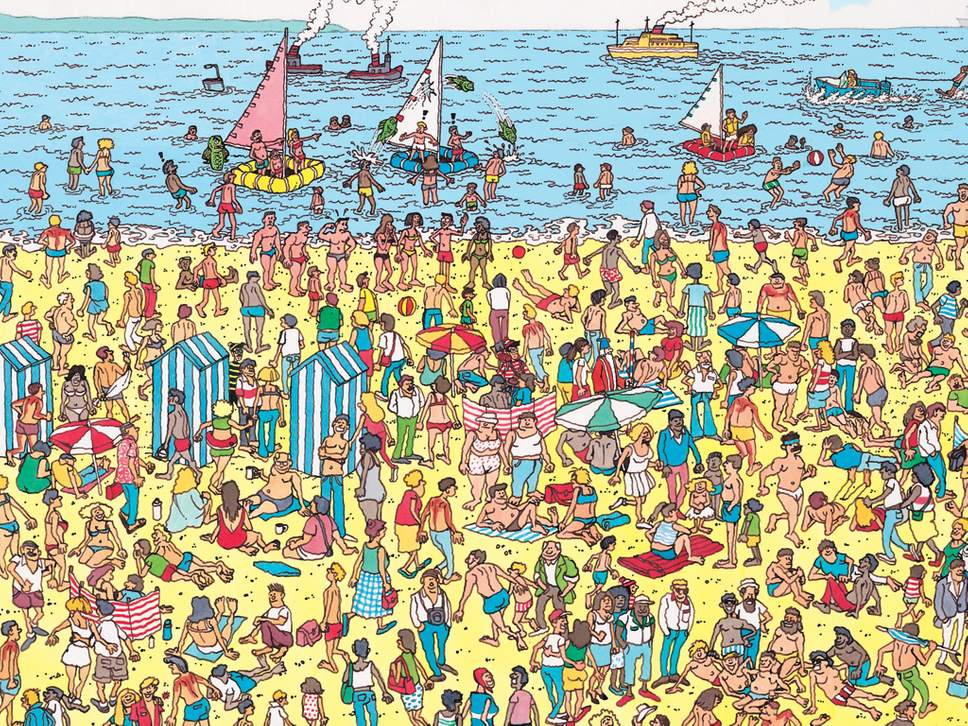

## Convolution on an Image 

### Kernel 
Here we introduce the kernel. A kernel is like a lens, which scans through the whole image. Kernel is not a new concept in machine learning. Decades before, the trend of machine learning was to find the specific feature, and the kernel can help the neural network to find that particular feature. Okay back to convolution. The convolution on an image means that we use that kernel to walk through the matrix (which we converted by the picture), and get another matrix.

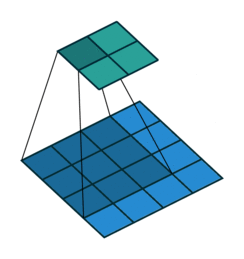

*This picture is a GIF!

Here is an example of convolution on an image. We can use the kernel  to do boundary detection. 

In [ ]:
def corr2d(X, K):  
    # Convolutional layer 
    h, w = K.shape
    # This is the shape of our output Y
    # You can try to calculate the size of Y by yourselves. 
    Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
          #Apply the kernel 
            Y[i, j] = (X[i:i + h, j:j + w] * K).sum()
    return Y

In [ ]:
# Define our picture 
X = torch.ones((6, 8))
X[:, 2:6] = 0
X

In [ ]:
# Define our kernel 
K = torch.tensor([[1.0, -1.0]])

In [ ]:
# Apply our kernal 
Y = corr2d(X, K)
Y

### Pooling 
When we are processing pictures, we always want to condense the information of a single image. Here we introduce the pooling. We have two most used pooling methods: 

1. Max Pooling: We choose the greatest number within the pool and save it into the next layer. 

2. Average Pooling: We choose the average of all the numbers within the pool and save it into the next layer.
You can see these examples below: 


In [ ]:
def pool2d(X, pool_size, mode='max'):
    # Size of pool
    p_h, p_w = pool_size
    # It is about the same formula as last function!
    Y = torch.zeros((X.shape[0] - p_h + 1, X.shape[1] - p_w + 1))
    # we need to iterate through the picture 
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            if mode == 'max':
                Y[i, j] = X[i:i + p_h, j:j + p_w].max()
            elif mode == 'avg':
                Y[i, j] = X[i:i + p_h, j:j + p_w].mean()
    return Y

Let's try to pooling a simple matrix X!

In [ ]:
# Let's define our matrix
X = torch.tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
X

In [ ]:
# Pooling with pool size of (2,2) using max pooling
pool2d(X, (2, 2))

In [ ]:
# Pooling with pool size of (2,2) using average pooling
pool2d(X, (2, 2), 'avg')

### Padding 
In padding, we add a margin to our original picture. Just like the picture below:

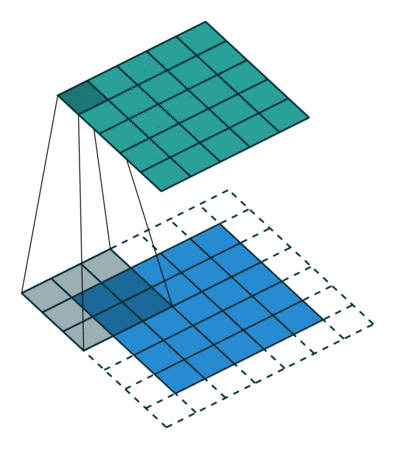

By using padding, we can keep our picture in the original dimension or even make it bigger!

### Striding 
When we have a really big image and want to have a relatively small picture to pass to the next layer, we can use striding to decrease the dimension of the output picture. In the image below, we have a stride of 2, which can help us produce an output of a two by two matrix. 


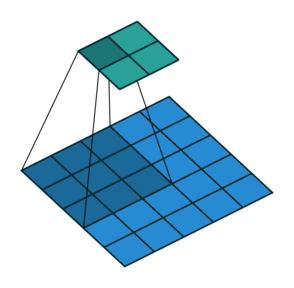

## AlexNet

AlexNet is one of the most famous convolutional neural network architectures. AlexNet competed in the ImageNet Large scale Visual Recognition Challenge on September 30, 2012. Here is the link to the paper which introduced AlexNet to the world: 
https://proceedings.neurips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf


We can take a look at some of the important pictures in this paper!

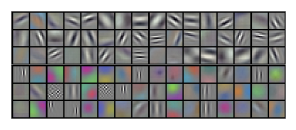

These are the kernels that Alexnet learned from the pictures. You can see that all the kernels of the first three rows are stripes, and the last three rows are some color or boundary detection. 

The graph below is the architecture of AlexNet. 

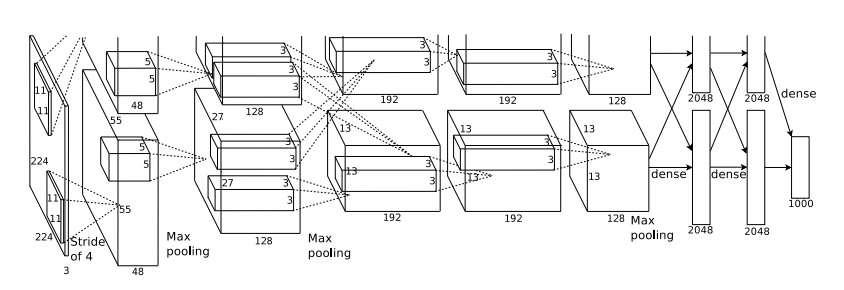

Here is a translation of the graph above:     


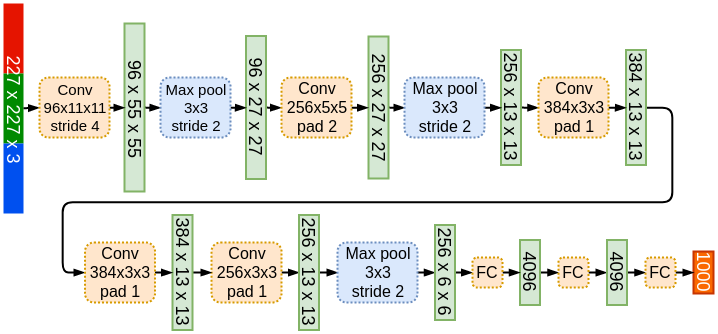

You can see that we are connecting what we have learned from this tutorial to build a CNN! and nothing special. 

Note that FC means fully connected, which is the same as the multilayer perceptron discussed before. We will pass all the information from the last layer to the next layer, which we are doing a fully connected layer. 

And now! Let's use Pytorch to build the AlexNet!  

In [ ]:
def corr2d(X, K):  
    #Recall the kernal function above!
    h, w = K.shape
    Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i:i + h, j:j + w] * K).sum()
    return Y

In [ ]:
# we can use the sequential() to build a sequential model using PyTorch
net = nn.Sequential(
    # kernal with kernal size of 11, stride of 4 and padding of 1
    nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1), nn.ReLU(),
    # Then we apply a max pooling 
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
    nn.Linear(6400, 4096), nn.ReLU(), nn.Dropout(p=0.5),
    nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(p=0.5),
    nn.Linear(4096, 10))

In [ ]:
# using these code we can monitor output size for each of the layers 
X = torch.randn(1, 1, 224, 224)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__, 'Output shape:\t', X.shape)

In [ ]:
# recall batch from the multilayer peceptron!
batch_size = 128
# we are using fashion mnist! you can check this website if you want to know more
# https://github.com/zalandoresearch/fashion-mnist
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)

In [ ]:
# learning rate = 0.01 
lr = 0.01
# Then we are doing a 10 epoch training 
num_epochs = 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

## Other things worth to mention!

Do you remember what we said about convolution in the very beginning? Two most important properties: invariance and locality. We use kernels to make our function with the property of locality. However, we have not achieved invariance yet. We can move the detected body around the picture and pass it into our neural network to make our network invariant to the location of the seen body. 

Here is the reading that can help you understand how to improve our convolutional neural network.
https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/

Also the codes of this tutorial is inspired by Machine Learning class by Dr. Li, Mu

GIFs in this tutorial is from https://github.com/vdumoulin/conv_arithmetic